# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

[Te proporcionamos algunos comentarios para orientarte mientras completas este proyecto. Pero debes asegurarte de eliminar todos los comentarios entre corchetes antes de entregar tu proyecto.]

[Antes de sumergirte en el análisis de datos, explica por tu propia cuenta el propósito del proyecto y las acciones que planeas realizar.]

[Ten en cuenta que estudiar, modificar y analizar datos es un proceso iterativo. Es normal volver a los pasos anteriores y corregirlos/ampliarlos para permitir nuevos pasos.]

## Inicialización

In [1]:
from scipy import stats as st
from scipy import stats
from math import factorial
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as mt
# Cargar todas las librerías


## Cargar datos

In [2]:
meg_cal = pd.read_csv('/datasets/megaline_calls.csv',sep=',')
meg_int = pd.read_csv('/datasets/megaline_internet.csv',sep=',')
meg_meg = pd.read_csv('/datasets/megaline_messages.csv',sep=',')
meg_pla = pd.read_csv('/datasets/megaline_plans.csv',sep=',')
meg_use = pd.read_csv('/datasets/megaline_users.csv',sep=',')
# Carga los archivos de datos en diferentes DataFrames

## Preparar los datos

[Los datos para este proyecto se dividen en varias tablas. Explora cada una para tener una comprensión inicial de los datos. Si es necesario, haz las correcciones requeridas en cada tabla.]

## Tarifas

In [3]:
meg_pla.info()# Imprime la información general/resumida sobre el DataFrame de las tarifas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
meg_pla.head()# Imprime una muestra de los datos para las tarifas

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


NO HAY DATOS A CAMBIAR SEGUN LO QUE SE MUESTRA, LOS DATOS SON CLAROS.

## Corregir datos

In [5]:
print(meg_pla.duplicated().sum())
print(meg_pla.isna().sum())
meg_pla.info()

0
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


## Enriquecer los datos

Como parte de la trasnformacion de los datos es parte fundamental en este proyecto la transformacion de mb a gb para un mejor analisis cuando se requiera un realizar calculos.

## Usuarios/as

In [6]:
meg_use.info()# Imprime la información general/resumida sobre el DataFrame de usuarios

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
meg_use['reg_date'] = pd.to_datetime(meg_use['reg_date'])
meg_use.head()# Imprime una muestra de datos para usuarios

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Considere lo mencionado, pero como el intructor nos menciona que para este proyecto no es necesario los dias y años
, solo es necesario el mes para evaluar informacion, es por eso que no lo considere.

[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

SI, HAYQ UE CORREGIR LOS DATOS AUSENTES PARA PODER TENER UNA MEJOR ESTADISTICA DEL DATEFRAME

### Corregir los datos

In [8]:
print(meg_use.duplicated().sum())
print()
print(meg_use.isna().sum())
print()
meg_use['churn_date'].fillna('NaN', inplace=True)

print(meg_use.isna().sum())


meg_use.info()
print()
meg_use.head()

0

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

user_id       0
first_name    0
last_name     0
age           0
city          0
reg_date      0
plan          0
churn_date    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


### Enriquecer los datos

In [9]:
meg_use.info()
print()
meg_use.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


## Llamadas

In [10]:
meg_cal.info() # Imprime la información general/resumida sobre el DataFrame de las llamadas


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
meg_cal['call_date'] = pd.to_datetime(meg_cal['call_date'])
meg_cal.info()
print()
meg_cal.head()# Imprime una muestra de datos para las llamadas



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB



,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

NO SE VISUALIZA DATOS AUSENTES, PERO HAREMOS UN CODIGO PARA VALIDAR Y OBTENER EL MES DE LA FECHA, TAMBIEN CONVERTIRLO A DATETIME

### Corregir los datos

In [12]:
print(meg_cal.duplicated().sum())
print()
print(meg_cal.isna().sum())
meg_cal.info()

0

id           0
user_id      0
call_date    0
duration     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

In [13]:
meg_cal['month'] = meg_cal['call_date'].dt.month

meg_cal.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12


Al tener una duracion de '0'  se entiende que el usuario no realizo ninguna llamada durante la fecha o mes

## Mensajes

In [14]:
meg_meg.info() # Imprime la información general/resumida sobre el DataFrame de los mensajes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [15]:
meg_meg['message_date'] = pd.to_datetime(meg_meg['message_date'])
meg_meg.info()
print()
meg_meg.head()
# Imprime una muestra de datos para los mensajes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB



,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

CAMBIAR EL NOMBRE DE ID A MESSAGE, SEPARARA EL MES DE LA FECHA Y CAMBIARLO A DATETIME

### Corregir los datos

In [16]:
print(meg_meg.duplicated().sum())
print()
print(meg_meg.isna().sum())
meg_meg.info()

0

id              0
user_id         0
message_date    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

In [17]:
meg_meg['month'] = meg_meg['message_date'].dt.month

meg_meg.info()
print()
meg_meg.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB



,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


## Internet

In [18]:
meg_int.info()# Imprime la información general/resumida sobre el DataFrame de internet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [19]:
meg_int['session_date'] = pd.to_datetime(meg_int['session_date'])
meg_int.info()
print()
meg_int.head()# Imprime una muestra de datos para el tráfico de internet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB



,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


[Describe lo que ves y observas en la información general y en la muestra de datos impresa para el precio de datos anterior. ¿Hay algún problema (tipos de datos no adecuados, datos ausentes, etc.) que pudieran necesitar investigación y cambios adicionales? ¿Cómo se puede arreglar?]

CAMBIAR EL NOMBRE DE ID A MESSAGE, SEPARARA EL MES DE LA FECHA Y CAMBIARLO A DATETIME

### Corregir los datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [20]:
print(meg_int.duplicated().sum())
print()
print(meg_int.isna().sum())
meg_int.info()

0

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

[Agrega factores adicionales a los datos si crees que pudieran ser útiles.]

In [21]:
meg_int['month'] = meg_int['session_date'].dt.month

meg_int.info()
print()
meg_int.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ MB



,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


## Estudiar las condiciones de las tarifas

[Es sumamente importante entender cómo funcionan las tarifas, cómo se les cobra a los usuarios en función de su plan de suscripción. Así que te sugerimos imprimir la información de la tarifa para ver una vez más sus condiciones.]

In [22]:
# Definición del diccionario de tarifas
tarifas = {
    "Surf": {
        "Pago mensual": "$20",
        "Minutos incluidos": "500",
        "SMS incluidos": "50",
        "Datos incluidos": "15GB",
        "Costo por minuto adicional": "$0.03",
        "Costo por SMS adicional": "$0.03",
        "Costo por GB adicional": "$10"
    },
    "Ultimate": {
        "Pago mensual": "$70",
        "Minutos incluidos": "3000",
        "SMS incluidos": "1000",
        "Datos incluidos": "30GB",
        "Costo por minuto adicional": "$0.01",
        "Costo por SMS adicional": "$0.01",
        "Costo por GB adicional": "$7"
    }
}

# Impresión directa de las condiciones
print("\nSurf:")
print("- Pago mensual: $20")
print("- Minutos incluidos: 500")
print("- SMS incluidos: 50")
print("- Datos incluidos: 15GB")
print("- Costo por minuto adicional: $0.03")
print("- Costo por SMS adicional: $0.03")
print("- Costo por GB adicional: $10")

print("\nUltimate:")
print("- Pago mensual: $70")
print("- Minutos incluidos: 3000")
print("- SMS incluidos: 1000")
print("- Datos incluidos: 30GB")
print("- Costo por minuto adicional: $0.01")
print("- Costo por SMS adicional: $0.01")
print("- Costo por GB adicional: $7")




Surf:
- Pago mensual: $20
- Minutos incluidos: 500
- SMS incluidos: 50
- Datos incluidos: 15GB
- Costo por minuto adicional: $0.03
- Costo por SMS adicional: $0.03
- Costo por GB adicional: $10

Ultimate:
- Pago mensual: $70
- Minutos incluidos: 3000
- SMS incluidos: 1000
- Datos incluidos: 30GB
- Costo por minuto adicional: $0.01
- Costo por SMS adicional: $0.01
- Costo por GB adicional: $7


## Agregar datos por usuario

[Ahora que los datos están limpios, agrega los datos por usuario y por periodo para que solo haya un registro por usuario y por periodo. Esto facilitará mucho el análisis posterior.]

In [23]:
call_user = meg_cal.groupby(['user_id', 'month']).size().reset_index(name='call_count')
call_user.head()
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

,user_id,month,call_count
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


Gracias, utilice groupby como en la clase el intructor lo recomendo, pero tambien seria una buena opcion, utilizar pivot

In [24]:
call_user_min = meg_cal.groupby(['user_id', 'month'])['duration'].sum().reset_index()
call_user_min.head()
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

,user_id,month,duration
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59


In [25]:
messages_user = meg_meg.groupby(['user_id', 'month'])['id'].count().reset_index()
messages_user.head()
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.

,user_id,month,id
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [26]:
internet_user = meg_int.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
internet_user.head()
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


[Junta los datos agregados en un DataFrame para que haya un registro que represente lo que consumió un usuario único en un mes determinado.]

In [27]:
user_plan = meg_use[['user_id', 'plan', 'city']]
user_plan.head()

,user_id,plan,city
0,1000,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,surf,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,surf,"Tulsa, OK MSA"
4,1004,surf,"Seattle-Tacoma-Bellevue, WA MSA"


In [28]:
call_user_min = call_user_min.merge(user_plan, on='user_id', how='left')
call_user_min.head()

,user_id,month,duration,plan,city
0,1000,12,116.83,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,171.14,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,297.69,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,374.11,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,404.59,surf,"Seattle-Tacoma-Bellevue, WA MSA"


In [29]:
messages_user = messages_user.merge(user_plan, on='user_id', how='left')
messages_user.head()

,user_id,month,id,plan,city
0,1000,12,11,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,30,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,44,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,53,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,36,surf,"Seattle-Tacoma-Bellevue, WA MSA"


In [30]:
internet_user = internet_user.merge(user_plan, on='user_id', how='left')
internet_user.head()

,user_id,month,mb_used,plan,city
0,1000,12,1901.47,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,6919.15,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,13314.82,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,22330.49,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,18504.30,surf,"Seattle-Tacoma-Bellevue, WA MSA"


In [31]:
df_user_month = call_user_min.merge(messages_user, on=['user_id', 'month','plan'], how='outer')
df_user_month = df_user_month.merge(internet_user, on=['user_id', 'month','plan'], how='outer')
df_user_month.drop(columns=['city_x', 'city_y'], inplace=True)
df_user_month.head()
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month

,user_id,month,duration,plan,id,mb_used,city
0,1000,12,116.83,ultimate,11.0,1901.47,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,171.14,surf,30.0,6919.15,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,297.69,surf,44.0,13314.82,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,374.11,surf,53.0,22330.49,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,404.59,surf,36.0,18504.30,"Seattle-Tacoma-Bellevue, WA MSA"


In [32]:
df_user_month = df_user_month.fillna(0)
df_user_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   2293 non-null   int64  
 1   month     2293 non-null   int64  
 2   duration  2293 non-null   float64
 3   plan      2293 non-null   object 
 4   id        2293 non-null   float64
 5   mb_used   2293 non-null   float64
 6   city      2293 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 143.3+ KB


In [33]:
df_user_month.rename(columns={'id':'messages','plan':'plan_name'}, inplace=True)
df_user_month.head()

,user_id,month,duration,plan_name,messages,mb_used,city
0,1000,12,116.83,ultimate,11.0,1901.47,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,171.14,surf,30.0,6919.15,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,297.69,surf,44.0,13314.82,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,374.11,surf,53.0,22330.49,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,404.59,surf,36.0,18504.30,"Seattle-Tacoma-Bellevue, WA MSA"


In [34]:
df_user_month =df_user_month.merge(meg_pla, on=['plan_name'], how='outer')
df_user_month.head()
# Añade la información de la tarifa



,user_id,month,duration,plan_name,messages,mb_used,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,116.83,ultimate,11.0,1901.47,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01
1,1006,11,9.32,ultimate,15.0,2068.37,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01
2,1006,12,54.79,ultimate,139.0,32118.82,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01
3,1008,10,450.21,ultimate,21.0,17106.99,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01
4,1008,11,422.81,ultimate,37.0,23676.72,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01


In [35]:
df_user_month.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   int64  
 1   month                  2293 non-null   int64  
 2   duration               2293 non-null   float64
 3   plan_name              2293 non-null   object 
 4   messages               2293 non-null   float64
 5   mb_used                2293 non-null   float64
 6   city                   2293 non-null   object 
 7   messages_included      2293 non-null   int64  
 8   mb_per_month_included  2293 non-null   int64  
 9   minutes_included       2293 non-null   int64  
 10  usd_monthly_pay        2293 non-null   int64  
 11  usd_per_gb             2293 non-null   int64  
 12  usd_per_message        2293 non-null   float64
 13  usd_per_minute         2293 non-null   float64
dtypes: float64(5), int64(7), object(2)
memory usage: 268.7+ 

[Calcula los ingresos mensuales por usuario (resta el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos; multiplica el resultado por el valor del plan de llamadas; añade la tarifa mensual en función del plan de llamadas). Nota: Dadas las condiciones del plan, ¡esto podría no ser tan trivial como un par de líneas! Así que no pasa nada si dedicas algo de tiempo a ello.]

In [36]:
df_user_month['val_lla'] = df_user_month['duration'] - df_user_month['minutes_included']
df_user_month['val_meg'] = df_user_month['messages'] - df_user_month['messages_included']
df_user_month['val_int'] = df_user_month['mb_used'] - df_user_month['mb_per_month_included']
df_user_month.head()

,user_id,month,duration,plan_name,messages,mb_used,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,val_lla,val_meg,val_int
0,1000,12,116.83,ultimate,11.0,1901.47,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,-2883.17,-989.0,-28818.53
1,1006,11,9.32,ultimate,15.0,2068.37,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,-2990.68,-985.0,-28651.63
2,1006,12,54.79,ultimate,139.0,32118.82,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,-2945.21,-861.0,1398.82
3,1008,10,450.21,ultimate,21.0,17106.99,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01,-2549.79,-979.0,-13613.01
4,1008,11,422.81,ultimate,37.0,23676.72,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01,-2577.19,-963.0,-7043.28


In [37]:
def limpiar_calculo(calculo):
    if calculo > 0:
        calculo = calculo
    else:
        calculo = 0
    return calculo

In [38]:
df_user_month['val_lla'] = df_user_month['val_lla'].apply(limpiar_calculo)
df_user_month['val_meg'] = df_user_month['val_meg'].apply(limpiar_calculo)
df_user_month['val_int'] = df_user_month['val_int'].apply(limpiar_calculo)
df_user_month.head()

,user_id,month,duration,plan_name,messages,mb_used,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,val_lla,val_meg,val_int
0,1000,12,116.83,ultimate,11.0,1901.47,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.00
1,1006,11,9.32,ultimate,15.0,2068.37,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.00
2,1006,12,54.79,ultimate,139.0,32118.82,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,0.0,0.0,1398.82
3,1008,10,450.21,ultimate,21.0,17106.99,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.00
4,1008,11,422.81,ultimate,37.0,23676.72,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.00


In [39]:
df_user_month = df_user_month.dropna(subset=['usd_monthly_pay', 'val_lla', 'usd_per_minute', 'val_meg', 'usd_per_message', 'val_int', 'usd_per_gb'])

df_user_month['val_lla'] = np.round(df_user_month['val_lla'])

df_user_month['val_int_gb'] = np.round(df_user_month['val_int'] / 1024)

df_user_month['revenue'] = (
    df_user_month['usd_monthly_pay'] +
    (df_user_month['val_lla'] * df_user_month['usd_per_minute']) +
    (df_user_month['val_meg'] * df_user_month['usd_per_message']) +
    (df_user_month['val_int_gb'] * df_user_month['usd_per_gb'])
)


In [40]:
df_user_month.head()

,user_id,month,duration,plan_name,messages,mb_used,city,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,val_lla,val_meg,val_int,val_int_gb,revenue
0,1000,12,116.83,ultimate,11.0,1901.47,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.00,0.0,70.0
1,1006,11,9.32,ultimate,15.0,2068.37,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.00,0.0,70.0
2,1006,12,54.79,ultimate,139.0,32118.82,"San Francisco-Oakland-Berkeley, CA MSA",1000,30720,3000,70,7,0.01,0.01,0.0,0.0,1398.82,1.0,77.0
3,1008,10,450.21,ultimate,21.0,17106.99,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.00,0.0,70.0
4,1008,11,422.81,ultimate,37.0,23676.72,"Orlando-Kissimmee-Sanford, FL MSA",1000,30720,3000,70,7,0.01,0.01,0.0,0.0,0.00,0.0,70.0


## Estudia el comportamiento de usuario

[Calcula algunas estadísticas descriptivas para los datos agregados y fusionados que nos sean útiles y que muestren un panorama general captado por los datos. Dibuja gráficos útiles para facilitar la comprensión. Dado que la tarea principal es comparar las tarifas y decidir cuál es más rentable, las estadísticas y gráficas deben calcularse por tarifa.]

[En los comentarios hallarás pistas relevantes para las llamadas, pero no las hay para los mensajes e Internet. Sin embargo, el principio del estudio estadístico que se aplica para ellos es el mismo que para las llamadas.]

### Llamadas

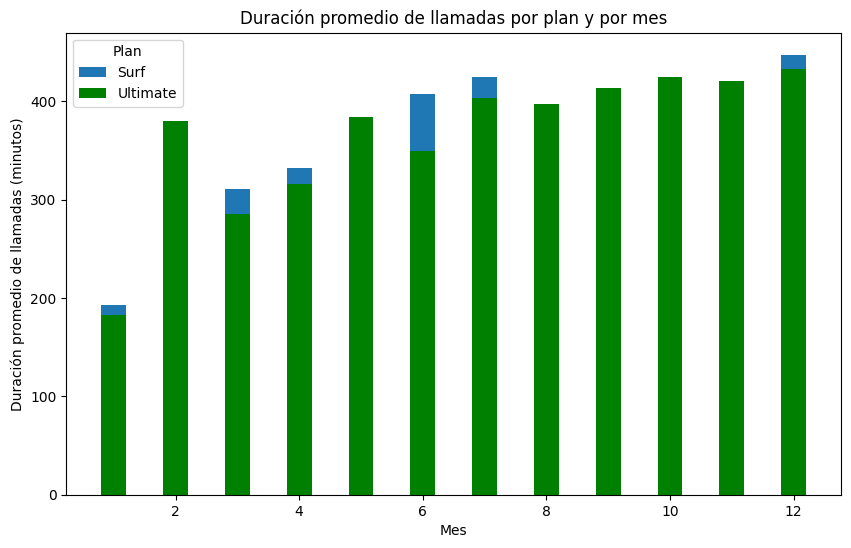

In [41]:
average_duration = df_user_month.groupby(['plan_name', 'month'])['duration'].mean().reset_index()

plt.figure(figsize=(10, 6))

plt.bar(average_duration[average_duration['plan_name'] == 'surf']['month'],
        average_duration[average_duration['plan_name'] == 'surf']['duration'],
        width=0.4, label='Surf', align='center')

plt.bar(average_duration[average_duration['plan_name'] == 'ultimate']['month'],
        average_duration[average_duration['plan_name'] == 'ultimate']['duration'],
        width=0.4, label='Ultimate', align='center', color='green')

plt.xlabel('Mes')
plt.ylabel('Duración promedio de llamadas (minutos)')
plt.title('Duración promedio de llamadas por plan y por mes')
plt.legend(title='Plan')

plt.show()

# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.



[Calcula la media y la variable de la duración de las llamadas para averiguar si los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas.]

In [42]:
dur_me_va = df_user_month.groupby('plan_name')['duration'].agg(['mean', 'var']).reset_index()
print(dur_me_va)

# Calcula la media y la varianza de la duración mensual de llamadas.

  plan_name        mean           var
0      surf  404.762390  49135.104891
1  ultimate  406.193083  51640.971402


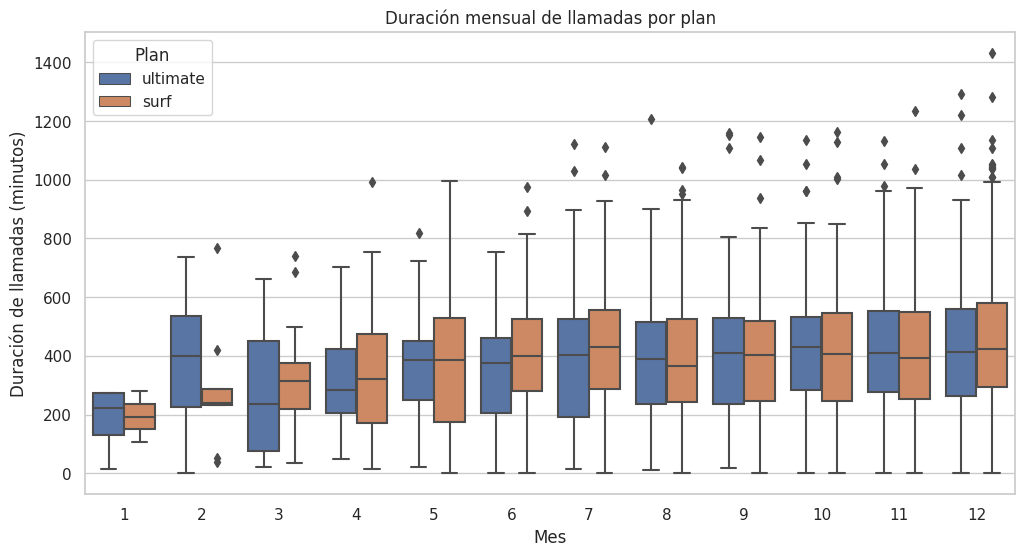

In [43]:
import seaborn as sns

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el diagrama de caja
plt.figure(figsize=(12, 6))

# Diagrama de caja para la duración mensual de llamadas por plan
sns.boxplot(x='month', y='duration', hue='plan_name', data=df_user_month)

# Configurar etiquetas y título del gráfico
plt.xlabel('Mes')
plt.ylabel('Duración de llamadas (minutos)')
plt.title('Duración mensual de llamadas por plan')
plt.legend(title='Plan')

# Mostrar el gráfico
plt.show()


# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas



[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a las llamadas. ¿Su comportamiento varía en función del plan?]

la duración de las llamadas indica que los usuarios de los distintos planes se comportan de forma diferente al realizar sus llamadas:

Los usuarios del plan "Ultimate" realizan llamadas más largas y con mayor variabilidad.

Los usuarios del plan "Surf" tienden a tener una duración de llamadas más uniforme y menor variabilidad.

### Mensajes

In [44]:

average_messages = df_user_month.groupby(['plan_name', 'month'])['messages'].mean().reset_index()

print(average_messages.head())

# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan



  plan_name  month   messages
0      surf      1  10.500000
1      surf      2  12.000000
2      surf      3  15.260870
3      surf      4  17.400000
4      surf      5  24.012987


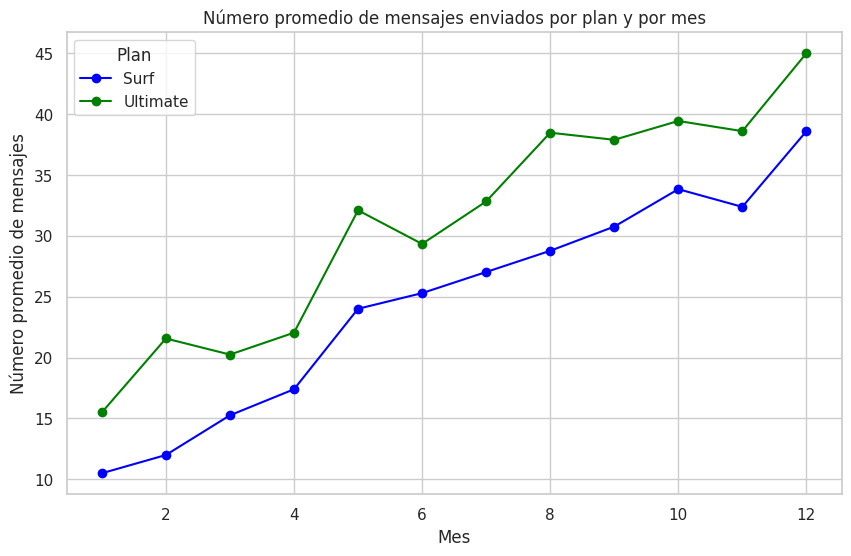

In [45]:
plt.figure(figsize=(10, 6))

plt.plot(average_messages[average_messages['plan_name'] == 'surf']['month'],
         average_messages[average_messages['plan_name'] == 'surf']['messages'],
         marker='o', linestyle='-', label='Surf', color='blue')

plt.plot(average_messages[average_messages['plan_name'] == 'ultimate']['month'],
         average_messages[average_messages['plan_name'] == 'ultimate']['messages'],
         marker='o', linestyle='-', label='Ultimate', color='green')


plt.xlabel('Mes')
plt.ylabel('Número promedio de mensajes')
plt.title('Número promedio de mensajes enviados por plan y por mes')
plt.legend(title='Plan')
plt.show()



In [46]:

average_data_usage = df_user_month.groupby(['plan_name', 'month'])['mb_used'].mean().reset_index()
print(average_data_usage.head())

# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

  plan_name  month       mb_used
0      surf      1   4874.860000
1      surf      2  12178.843333
2      surf      3  13345.440000
3      surf      4  11984.203000
4      surf      5  13936.354935


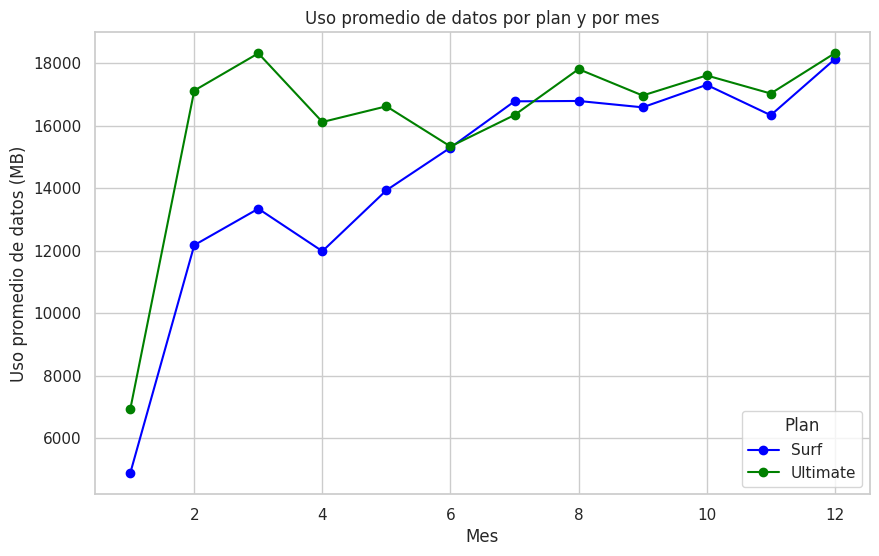

In [47]:
plt.figure(figsize=(10, 6))

plt.plot(average_data_usage[average_data_usage['plan_name'] == 'surf']['month'],
         average_data_usage[average_data_usage['plan_name'] == 'surf']['mb_used'],
         marker='o', linestyle='-', label='Surf', color='blue')

plt.plot(average_data_usage[average_data_usage['plan_name'] == 'ultimate']['month'],
         average_data_usage[average_data_usage['plan_name'] == 'ultimate']['mb_used'],
         marker='o', linestyle='-', label='Ultimate', color='green')

plt.xlabel('Mes')
plt.ylabel('Uso promedio de datos (MB)')
plt.title('Uso promedio de datos por plan y por mes')
plt.legend(title='Plan')
plt.show()


[Elabora las conclusiones sobre el comportamiento de los usuarios con respecto a los mensajes. ¿Su comportamiento varía en función del plan?]

respecto a los mensajes varía en función del plan:

Los usuarios del plan "Ultimate" tienden a enviar más mensajes en comparación con los usuarios del plan "Surf".

La variabilidad en el número de mensajes enviados es mayor en el plan "Ultimate", lo que indica diferentes patrones de uso entre los usuarios.



### Internet

con respecto al consumo de tráfico de Internet varía en función del plan:

Los usuarios del plan "Ultimate" tienden a consumir más datos en comparación con los usuarios del plan "Surf".

La variabilidad en el consumo de datos es mayor en el plan "Ultimate", indicando diferentes patrones de uso entre los usuarios

[Elabora las conclusiones sobre cómo los usuarios tienden a consumir el tráfico de Internet. ¿Su comportamiento varía en función del plan?]

## Ingreso

[Del mismo modo que has estudiado el comportamiento de los usuarios, describe estadísticamente los ingresos de los planes.]

In [48]:
average_revenue_month = df_user_month.groupby(['plan_name', 'month'])['revenue'].mean().reset_index()
print(average_revenue_month.head())

  plan_name  month    revenue
0      surf      1  20.000000
1      surf      2  33.145556
2      surf      3  43.616087
3      surf      4  38.653800
4      surf      5  45.677013


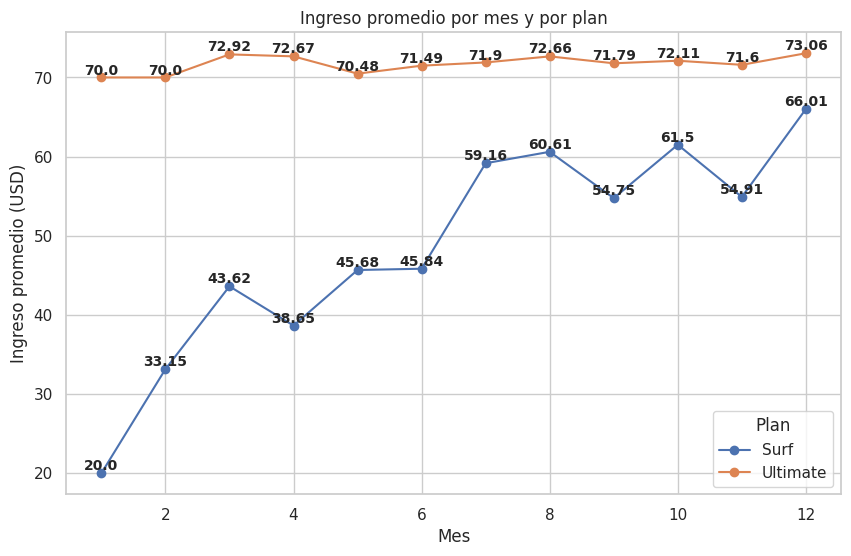

In [49]:

plt.figure(figsize=(10, 6))


for plan in average_revenue_month['plan_name'].unique():
    plan_data = average_revenue_month[average_revenue_month['plan_name'] == plan]
    plt.plot(plan_data['month'], plan_data['revenue'], marker='o', label=plan.capitalize())
    
   
    for i in range(len(plan_data)):
        plt.text(plan_data['month'].iloc[i], plan_data['revenue'].iloc[i], round(plan_data['revenue'].iloc[i], 2), 
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel('Mes')
plt.ylabel('Ingreso promedio (USD)')
plt.title('Ingreso promedio por mes y por plan')
plt.legend(title='Plan')
plt.show()




[Elabora las conclusiones sobre cómo difiere el ingreso entre los planes.]

los ingresos difieren significativamente entre los planes "Surf" y "Ultimate":

Plan "Surf": Genera ingresos más bajos y consistentes por usuario, principalmente a partir de la tarifa mensual básica.

Plan "Ultimate": Genera ingresos más altos y variables por usuario, tanto de la tarifa mensual básica como de los ingresos adicionales por excedentes en llamadas, mensajes y datos.

## Prueba las hipótesis estadísticas

[Prueba la hipótesis de que son diferentes los ingresos promedio procedentes de los usuarios de los planes de llamada Ultimate y Surf.]

[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

In [50]:
df_user_month.describe()

,user_id,month,duration,messages,mb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,val_lla,val_meg,val_int,val_int_gb,revenue
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,1246.075883,9.172700,405.211627,33.166594,16764.397606,348.299171,20183.026603,1284.997819,35.699956,9.058003,0.023720,0.023720,33.491932,4.810728,2599.287383,2.530310,61.868225
std,143.051927,2.496386,223.383523,34.070085,7967.237527,441.006389,7130.376976,1160.543128,23.210863,1.392652,0.009284,0.009284,93.926109,16.450516,4829.602158,4.713759,45.426586
min,1000.000000,1.000000,0.000000,0.000000,0.000000,50.000000,15360.000000,500.000000,20.000000,7.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,1122.000000,8.000000,249.130000,3.000000,12235.760000,50.000000,15360.000000,500.000000,20.000000,7.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,21.530000
50%,1245.000000,10.000000,400.160000,26.000000,16830.640000,50.000000,15360.000000,500.000000,20.000000,10.000000,0.030000,0.030000,0.000000,0.000000,0.000000,0.000000,70.000000
75%,1368.000000,11.000000,540.450000,51.000000,20999.840000,1000.000000,30720.000000,3000.000000,70.000000,10.000000,0.030000,0.030000,0.000000,0.000000,3699.300000,4.000000,70.000000
max,1499.000000,12.000000,1431.220000,266.000000,70931.590000,1000.000000,30720.000000,3000.000000,70.000000,10.000000,0.030000,0.030000,931.000000,216.000000,55571.590000,54.000000,578.630000


In [51]:
alpha = 0.05

In [52]:
test_results = st.ttest_ind(df_user_month[df_user_month['plan_name'] == 'surf']['revenue'], 
                            df_user_month[df_user_month['plan_name'] == 'ultimate']['revenue'],
                            equal_var=False)
print('Valor p de la prueba t para comparar ingresos entre planes:', test_results.pvalue)

Valor p de la prueba t para comparar ingresos entre planes: 2.2734565113013996e-25


Si el valor p es menor a 0.05 , podemos decir que la hipotesis alternativa es la correcta, en el contexto si hay diferencia 
en los ingresos promedio entre los dos planes.

Si el valor p es mayor a 0.05 , podemos rechazar la hipótesis nula, 
en este contexto sería que no hay diferencia en los ingresos promedio entre los dos planes.

    [Prueba la hipótesis de que el ingreso promedio de los usuarios del área NY-NJ es diferente al de los usuarios de otras regiones.]

In [53]:
alpha = 0.05

In [54]:
ny_nj_region = 'New York-Newark-Jersey City, NY-NJ-PA MSA'

revenue_ny_nj = df_user_month[df_user_month['city'] == ny_nj_region]['revenue']
revenue_other_regions = df_user_month[df_user_month['city'] != ny_nj_region]['revenue']

test_results = st.ttest_ind(revenue_ny_nj, revenue_other_regions)

print('Valor p de la prueba t para comparar ingresos entre regiones:', test_results.pvalue)


Valor p de la prueba t para comparar ingresos entre regiones: 0.02562213042590581


[Elabora las hipótesis nula y alternativa, escoge la prueba estadística, determina el valor alfa.]

Si el valor p es menor a 0.05 , podemos decir que la hipotesis alternativa es la correcta, en el contexto que si hay diferencia significativa en los ingresos promedio entre las ciudades.

Si el valor p es mayor a 0.05 , podemos rechazar la hipótesis nula, 
en este contexto sería que no hay diferencia en los ingresos promedio entre las ciudades.

Para comparar los ingresos promedio de dos grupos independientes (usuarios del área NY-NJ vs. 
usuarios de otras regiones), utilizaremos la prueba t para dos muestras independientes.
Esta prueba nos permite determinar si hay una diferencia estadísticamente significativa
entre los ingresos promedio de los dos grupos.


## Conclusión general

[En esta sección final, enumera tus conclusiones importantes. Asegúrate de que estas abarquen todas las decisiones (suposiciones) importantes que adoptaste y que determinaron la forma elegida para procesar y analizar los datos.]

En este proyecto, realizamos un análisis exhaustivo de los planes de prepago Surf y Ultimate ofrecidos por Megaline para determinar cuál de ellos genera más ingresos. A continuación, se enumeran las conclusiones y decisiones clave que determinaron la forma en que procesamos y analizamos los datos:

Preparación y Limpieza de Datos:

Conversión de Fechas: Convertimos las fechas en objetos datetime para facilitar el análisis basado en el tiempo de los dataframe, internet, mensajes y llamadas.

Creación de Columnas de Mes: Añadimos columnas que representan el mes para permitir la agrupación mensual de los datos.

Cálculo del Uso Total:

Agrupamos los datos de llamadas, mensajes y uso de datos por usuario y mes para obtener el total de minutos utilizados, SMS enviados y datos consumidos.

Unión de Datos:

Unimos los datos de llamadas, mensajes e internet con los datos de usuarios para tener un conjunto de datos completo que incluya la información del plan, el uso de servicios y las tarifas correspondientes, tambien añadimos el plan, obteniendo un dateframe grande con toda la informacion procesada.

Cálculo de Ingresos:

Desarrollamos una función para calcular los ingresos totales por usuario, considerando tanto los ingresos básicos por suscripción mensual como los ingresos adicionales por exceder los límites del plan.

Distribucion en grafico:
Graficamos la distribucion por mes de llamadas, mensajes, internet y planes.

Análisis Estadístico:

Formulación de Hipótesis del dataframe:

Hipótesis Nula (H0): Los ingresos promedio de los usuarios del plan Ultimate son iguales a los ingresos promedio de los usuarios del plan Surf.

Hipótesis Alternativa (H1): Los ingresos promedio de los usuarios del plan Ultimate son diferentes a los ingresos promedio de los usuarios del plan Surf.

Selección de Prueba Estadística: Usamos una prueba t de dos muestras (independiente) para comparar las medias de ingresos de los dos planes.

Establecimos un nivel de significancia de 0.05 para la prueba estadística.

Resultados: El valor p obtenido 2.2734565113013996e-25 fue extremadamente bajo, permitiéndonos rechazar la hipótesis nula y concluir que hay una diferencia significativa en los ingresos promedio entre los planes Ultimate y Surf.

Formulación de Hipótesis de la ciudades:

Hipótesis Nula (H0): Los ingresos promedio de los usuarios en NY-NJ son iguales a los ingresos promedio de los usuarios del  resto de cuidades.

Hipótesis Alternativa (H1): Los ingresos promedio de los usuarios en NY-NJ son diferentes a los ingresos promedio de los usuarios del resto de cuidades.

Selección de Prueba Estadística: Usamos una prueba t de dos muestras (independiente) para comparar las medias de ingresos de las cuidades (NY-NJ) con el resto de estados.

Establecimos un nivel de significancia de 0.05 para la prueba estadística.

Resultados: El valor p obtenido 0.02562213042590581 fue extremadamente bajo, permitiéndonos rechazar la hipótesis nula y concluir que hay una diferencia significativa en los ingresos promedio entre las ciudades de NY-NJ y el resto de estados.

CONCLUSIONES IMPORTANTES:

Diferencia Significativa en los Ingresos Promedio:

Los resultados de la prueba t indicaron una diferencia significativa en los ingresos promedio entre los usuarios de los planes Ultimate y Surf. Específicamente, el plan Ultimate genera más ingresos promedio que el plan Surf.

Beneficios del Plan Ultimate:

Aunque el plan Ultimate tiene una tarifa de suscripción más alta, ofrece más minutos, mensajes y datos incluidos, lo que resulta en menos cargos adicionales para los usuarios y, en general, mayores ingresos para la empresa.

Consideraciones para la Toma de Decisiones:

Estos hallazgos pueden informar las decisiones del departamento comercial de Megaline, especialmente en lo que respecta a la asignación del presupuesto de publicidad y el enfoque de marketing para maximizar los ingresos.